In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\tvams\OneDrive\Desktop\Imputation methods\R-K-Puram-final-datasets.csv')
data.head()

,Date,Day,Month,Year,PM25,PM10,NO2,NH3,SO2,CO,Ozone,RH,WS,WD,SR,Temp,Dew,Pre
0,1/1/2017,1,1,2017,NaN,326.82,56.41,55.61,28.14,3.82,21.92,75.23,0.87,192.24,74.27,14.83,4.92,0.00
1,1/2/2017,2,1,2017,NaN,323.00,69.20,53.96,21.63,3.46,24.35,72.57,0.60,201.23,76.35,15.09,6.27,0.01
2,1/3/2017,3,1,2017,222.00,361.72,73.33,53.05,28.63,3.75,24.44,74.10,0.51,228.49,76.33,16.32,3.85,0.00
3,1/4/2017,4,1,2017,206.84,303.91,51.46,47.04,22.16,3.11,32.17,69.01,0.64,157.43,80.48,16.91,3.27,0.00
4,1/5/2017,5,1,2017,278.41,341.33,64.21,47.16,27.88,3.99,32.03,70.46,0.52,191.89,75.36,18.00,1.26,0.00


In [3]:
data.dtypes

Date      object
Day        int64
Month      int64
Year       int64
PM25     float64
PM10     float64
NO2      float64
NH3      float64
SO2      float64
CO       float64
Ozone    float64
RH       float64
WS       float64
WD       float64
SR       float64
Temp     float64
Dew      float64
Pre      float64
dtype: object

In [4]:
#convert object to numeric datatype
data['PM25'] = pd.to_numeric(data['PM25'], errors='coerce')
data['PM10'] = pd.to_numeric(data['PM10'], errors='coerce')
data['NO2'] = pd.to_numeric(data['NO2'], errors='coerce')
data['NH3'] = pd.to_numeric(data['NH3'], errors='coerce')
data['SO2'] = pd.to_numeric(data['SO2'], errors='coerce')
data['CO'] = pd.to_numeric(data['CO'], errors='coerce')
data['Ozone'] = pd.to_numeric(data['Ozone'], errors='coerce')
data['RH'] = pd.to_numeric(data['RH'], errors='coerce')
data['WS'] = pd.to_numeric(data['WS'], errors='coerce')
data['WD'] = pd.to_numeric(data['WD'], errors='coerce')
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')

In [5]:
data.dtypes

Date      object
Day        int64
Month      int64
Year       int64
PM25     float64
PM10     float64
NO2      float64
NH3      float64
SO2      float64
CO       float64
Ozone    float64
RH       float64
WS       float64
WD       float64
SR       float64
Temp     float64
Dew      float64
Pre      float64
dtype: object

In [6]:
data.describe()

,Day,Month,Year,PM25,PM10,NO2,NH3,SO2,CO,Ozone,RH,WS,WD,SR,Temp,Dew,Pre
count,2556.000000,2556.000000,2556.0,2504.000000,2465.000000,2508.000000,2383.000000,2452.000000,2436.000000,2463.000000,2516.000000,2483.000000,2516.000000,2520.000000,2556.000000,2556.000000,2556.000000
mean,15.725743,6.524257,2020.0,107.239683,208.396434,50.048013,30.964680,15.958344,1.354598,42.016542,59.884377,0.860008,185.378128,102.707930,25.232379,11.561686,2.077907
std,8.800168,3.449013,2.0,87.262396,120.906788,26.504311,20.561461,9.562230,0.738941,20.534734,15.261692,0.470334,32.033458,36.307355,7.770106,9.242727,6.076220
min,1.000000,1.000000,2017.0,1.000000,7.350000,0.270000,0.100000,0.758333,0.000000,1.670000,0.580000,0.020000,2.380000,0.000000,7.260000,-12.620000,0.000000
25%,8.000000,4.000000,2018.0,43.964479,108.000000,31.270000,19.239405,9.590000,0.796354,26.915000,50.482500,0.540000,170.795313,80.150000,18.462500,4.287500,0.000000
50%,16.000000,7.000000,2020.0,80.470000,195.740000,47.000625,26.250000,14.275000,1.250000,39.470000,62.521979,0.720000,186.913542,104.435000,27.130000,10.360000,0.000000
75%,23.000000,10.000000,2022.0,147.405000,281.300000,66.025000,35.241354,19.655000,1.690000,53.494479,70.615000,1.050000,209.617500,124.067396,31.205000,20.780000,0.692500
max,31.000000,12.000000,2023.0,686.650000,935.070000,208.360000,108.230000,103.261111,5.190000,158.840000,95.360000,4.050000,265.070000,389.350000,40.420000,27.230000,70.220000


In [7]:
data.shape

(2556, 18)

In [8]:
data.head()

,Date,Day,Month,Year,PM25,PM10,NO2,NH3,SO2,CO,Ozone,RH,WS,WD,SR,Temp,Dew,Pre
0,1/1/2017,1,1,2017,NaN,326.82,56.41,55.61,28.14,3.82,21.92,75.23,0.87,192.24,74.27,14.83,4.92,0.00
1,1/2/2017,2,1,2017,NaN,323.00,69.20,53.96,21.63,3.46,24.35,72.57,0.60,201.23,76.35,15.09,6.27,0.01
2,1/3/2017,3,1,2017,222.00,361.72,73.33,53.05,28.63,3.75,24.44,74.10,0.51,228.49,76.33,16.32,3.85,0.00
3,1/4/2017,4,1,2017,206.84,303.91,51.46,47.04,22.16,3.11,32.17,69.01,0.64,157.43,80.48,16.91,3.27,0.00
4,1/5/2017,5,1,2017,278.41,341.33,64.21,47.16,27.88,3.99,32.03,70.46,0.52,191.89,75.36,18.00,1.26,0.00


In [9]:
#Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 18)


Continuous variables are :  Index(['Day', 'Month', 'Year', 'PM25', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
       'Ozone', 'RH', 'WS', 'WD', 'SR', 'Temp', 'Dew', 'Pre'],
      dtype='object')


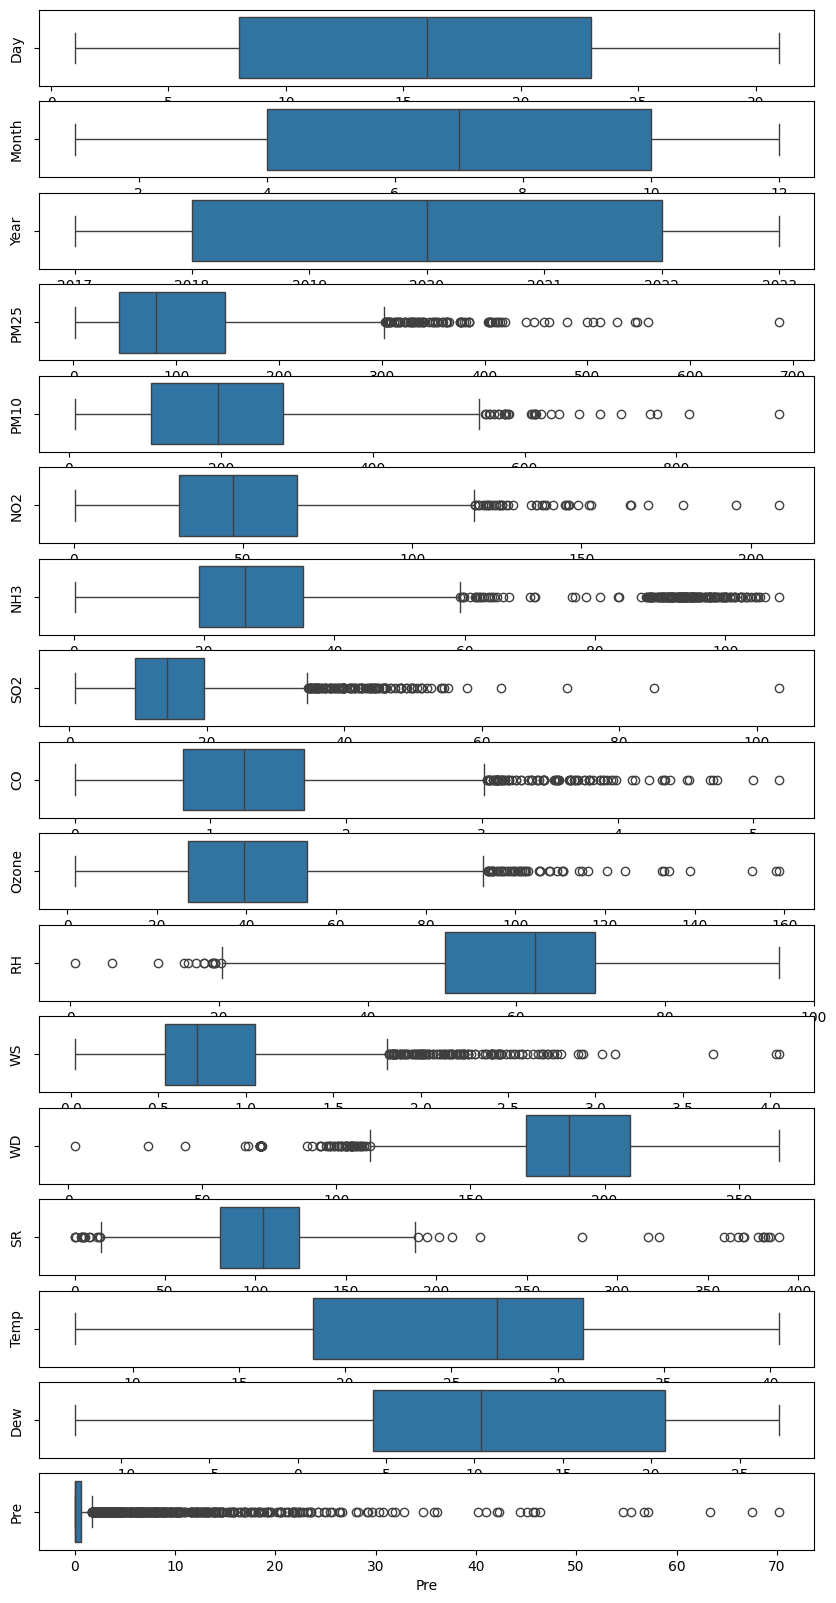

In [10]:
#Flooring and Capping outliers using IQR
num_cols =data.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)

plt.figure(figsize=(10,20))
for i, col in enumerate(num_cols,1):
     plt.subplot(17,1,i)
     sns.boxplot(data[col], orient="h")
     plt.ylabel(col)
plt.show()

In [11]:
#IQR to be done for: PM25, PM10, NO2, NH3, SO2, CO, Ozone, RH, WS, SR, Pre
#Finding the IQR
percentile25 = data['PM25'].quantile(0.25)
percentile75 = data['PM25'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['PM25']=np.where(data['PM25']>upper_limit,upper_limit,np.where(data['PM25']<lower_limit,lower_limit,data['PM25']))

In [12]:
#Finding the IQR
percentile25 = data['PM10'].quantile(0.25)
percentile75 = data['PM10'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['PM10']=np.where(data['PM10']>upper_limit,upper_limit,np.where(data['PM10']<lower_limit,lower_limit,data['PM10']))

In [13]:
#Finding the IQR
percentile25 = data['CO'].quantile(0.25)
percentile75 = data['CO'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['CO']=np.where(data['CO']>upper_limit,upper_limit,np.where(data['CO']<lower_limit,lower_limit,data['CO']))

In [14]:
#Finding the IQR
percentile25 = data['Ozone'].quantile(0.25)
percentile75 = data['Ozone'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['Ozone']=np.where(data['Ozone']>upper_limit,upper_limit,np.where(data['Ozone']<lower_limit,lower_limit,data['Ozone']))

In [15]:
#Finding the IQR
percentile25 = data['NO2'].quantile(0.25)
percentile75 = data['NO2'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['NO2']=np.where(data['NO2']>upper_limit,upper_limit,np.where(data['NO2']<lower_limit,lower_limit,data['NO2']))


In [16]:
#Finding the IQR
percentile25 = data['SO2'].quantile(0.25)
percentile75 = data['SO2'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['SO2']=np.where(data['SO2']>upper_limit,upper_limit,np.where(data['SO2']<lower_limit,lower_limit,data['SO2']))

In [17]:
#Finding the IQR
percentile25 = data['NH3'].quantile(0.25)
percentile75 = data['NH3'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['NH3']=np.where(data['NH3']>upper_limit,upper_limit,np.where(data['NH3']<lower_limit,lower_limit,data['NH3']))


In [18]:
#Finding the IQR
percentile25 = data['RH'].quantile(0.25)
percentile75 = data['RH'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['RH']=np.where(data['RH']>upper_limit,upper_limit,np.where(data['RH']<lower_limit,lower_limit,data['RH']))

In [19]:
#Finding the IQR
percentile25 = data['WS'].quantile(0.25)
percentile75 = data['WS'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['WS']=np.where(data['WS']>upper_limit,upper_limit,np.where(data['WS']<lower_limit,lower_limit,data['WS']))

In [20]:
#Finding the IQR
percentile25 = data['SR'].quantile(0.25)
percentile75 = data['SR'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['SR']=np.where(data['SR']>upper_limit,upper_limit,np.where(data['SR']<lower_limit,lower_limit,data['SR']))

In [21]:
#Finding the IQR
percentile25 = data['Pre'].quantile(0.25)
percentile75 = data['Pre'].quantile(0.75)
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data['Pre']=np.where(data['Pre']>upper_limit,upper_limit,np.where(data['Pre']<lower_limit,lower_limit,data['Pre']))

Continuous variables are :  Index(['Day', 'Month', 'Year', 'PM25', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
       'Ozone', 'RH', 'WS', 'WD', 'SR', 'Temp', 'Dew', 'Pre'],
      dtype='object')


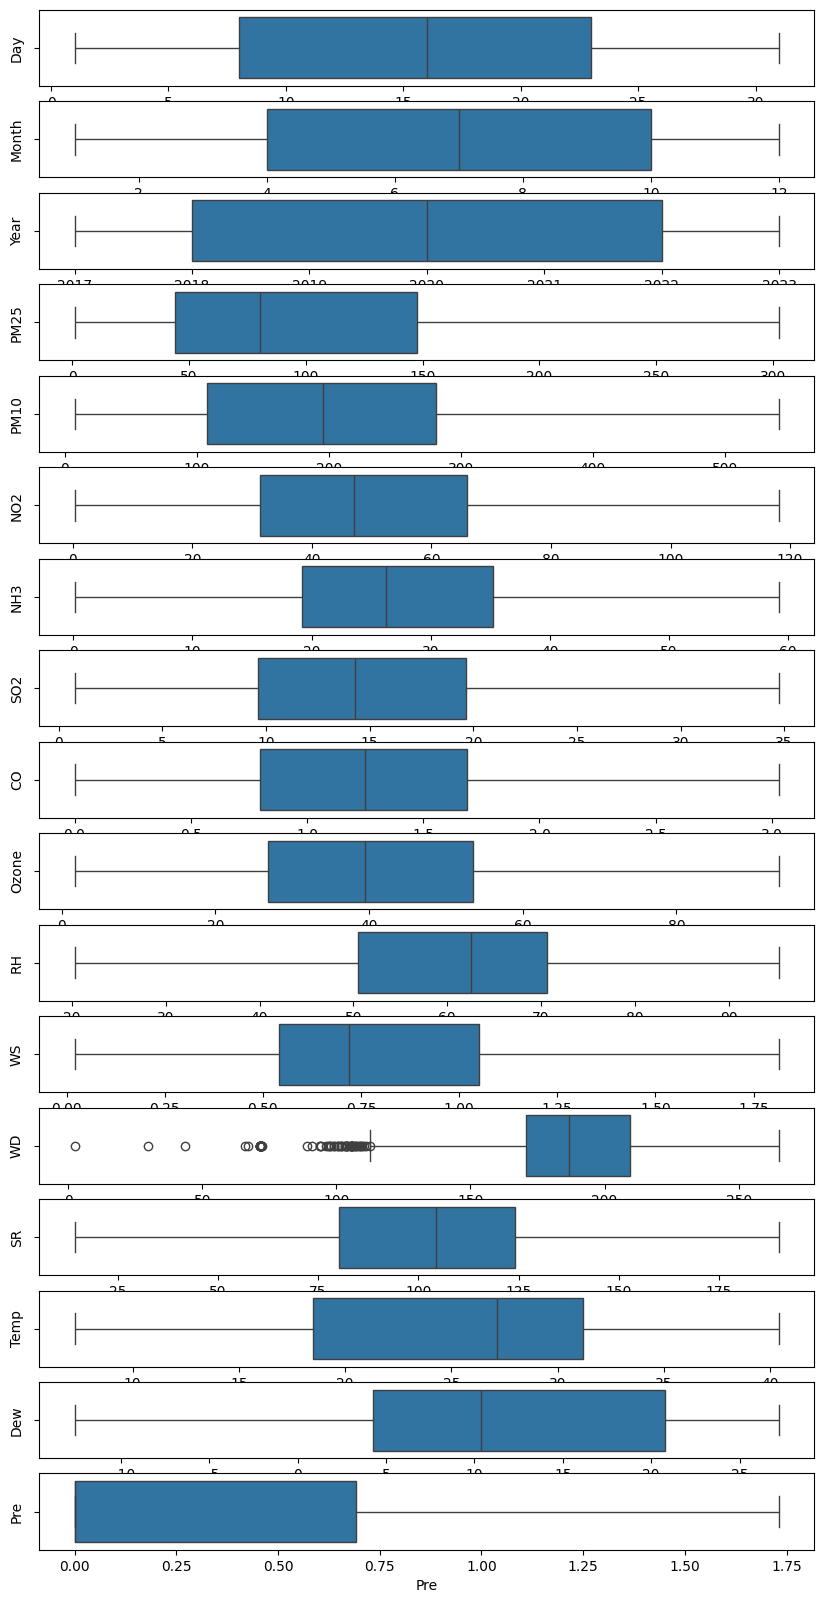

In [22]:
# After outlier correction using IQR
print('Continuous variables are : ',num_cols.columns)

plt.figure(figsize=(10,20))
for i, col in enumerate(num_cols,1):
     plt.subplot(17,1,i)
     sns.boxplot(data[col], orient="h")
     plt.ylabel(col)
plt.show()

In [23]:
#Assign season based on month
def cal_season(a):
    season = ['Winter', 'Summer', 'Monsoon', 'Rainfall']

    if a == 12 or a == 1 or a == 2:
        return season[0]
    elif a == 3 or a == 4 or a == 5 or a == 6:
        return season[1]
    elif a == 7 or a == 8:
        return season[2]
    else:
        return season[3]

In [24]:
def cal_season(a):
    if a == 12 or a == 1 or a == 2:
        return 0
    elif a == 3 or a == 4 or a == 5 or a == 6:
        return 1
    elif a == 7 or a == 8:
        return 2
    else:
        return 3

In [25]:
data['Season'] = 0
for i in range(len(data)):
    a = data['Month'].iloc[i]
    data['Season'].iloc[i] = cal_season(a)

C:\Users\tvams\AppData\Local\Temp\ipykernel_2952\1398904011.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Season'].iloc[i] = cal_season(a)
C:\Users\tvams\AppData\Local\Temp\ipykernel_2952\1398904011.py:4: SettingWithCopyWarning: 

In [26]:
#Assign weekday or not
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date      datetime64[ns]
Day                int64
Month              int64
Year               int64
PM25             float64
PM10             float64
NO2              float64
NH3              float64
SO2              float64
CO               float64
Ozone            float64
RH               float64
WS               float64
WD               float64
SR               float64
Temp             float64
Dew              float64
Pre              float64
Season             int64
dtype: object

In [27]:
#check if the day weekday or not
data["IsWeekday"] = data["Date"].dt.weekday < 5
data.head()

,Date,Day,Month,Year,PM25,PM10,NO2,NH3,SO2,CO,Ozone,RH,WS,WD,SR,Temp,Dew,Pre,Season,IsWeekday
0,2017-01-01,1,1,2017,NaN,326.82,56.41,55.61,28.14,3.030469,21.92,75.23,0.87,192.24,74.27,14.83,4.92,0.00,0,False
1,2017-01-02,2,1,2017,NaN,323.00,69.20,53.96,21.63,3.030469,24.35,72.57,0.60,201.23,76.35,15.09,6.27,0.01,0,True
2,2017-01-03,3,1,2017,222.00,361.72,73.33,53.05,28.63,3.030469,24.44,74.10,0.51,228.49,76.33,16.32,3.85,0.00,0,True
3,2017-01-04,4,1,2017,206.84,303.91,51.46,47.04,22.16,3.030469,32.17,69.01,0.64,157.43,80.48,16.91,3.27,0.00,0,True
4,2017-01-05,5,1,2017,278.41,341.33,64.21,47.16,27.88,3.030469,32.03,70.46,0.52,191.89,75.36,18.00,1.26,0.00,0,True


In [28]:
data.dtypes

Date         datetime64[ns]
Day                   int64
Month                 int64
Year                  int64
PM25                float64
PM10                float64
NO2                 float64
NH3                 float64
SO2                 float64
CO                  float64
Ozone               float64
RH                  float64
WS                  float64
WD                  float64
SR                  float64
Temp                float64
Dew                 float64
Pre                 float64
Season                int64
IsWeekday              bool
dtype: object

In [29]:
data['IsWeekday'] = data['IsWeekday'].astype('int')
data.dtypes

Date         datetime64[ns]
Day                   int64
Month                 int64
Year                  int64
PM25                float64
PM10                float64
NO2                 float64
NH3                 float64
SO2                 float64
CO                  float64
Ozone               float64
RH                  float64
WS                  float64
WD                  float64
SR                  float64
Temp                float64
Dew                 float64
Pre                 float64
Season                int64
IsWeekday             int32
dtype: object

In [30]:
#change Date column from datetime64[ns] to Object back after weekday calculation
data['Date']=data['Date'].astype(str)
data.dtypes

Date          object
Day            int64
Month          int64
Year           int64
PM25         float64
PM10         float64
NO2          float64
NH3          float64
SO2          float64
CO           float64
Ozone        float64
RH           float64
WS           float64
WD           float64
SR           float64
Temp         float64
Dew          float64
Pre          float64
Season         int64
IsWeekday      int32
dtype: object

In [31]:
#Replacing the Null Values
#display percentage of null values of each col before imputation
data.isnull().sum()

Date           0
Day            0
Month          0
Year           0
PM25          52
PM10          91
NO2           48
NH3          173
SO2          104
CO           120
Ozone         93
RH            40
WS            73
WD            40
SR            36
Temp           0
Dew            0
Pre            0
Season         0
IsWeekday      0
dtype: int64

In [32]:
print("total missing data=", data.isnull().sum().sum())

total missing data= 870


In [33]:
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

NH3          6.768388
CO           4.694836
SO2          4.068858
Ozone        3.638498
PM10         3.560250
WS           2.856025
PM25         2.034429
NO2          1.877934
RH           1.564945
WD           1.564945
SR           1.408451
Temp         0.000000
Season       0.000000
Pre          0.000000
Dew          0.000000
Date         0.000000
Day          0.000000
Year         0.000000
Month        0.000000
IsWeekday    0.000000
dtype: float64

In [34]:
total_missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100
print(data.shape[0])
print(total_missing_percentage)


2556
1.7018779342723005


In [35]:
# write step1 processed data to Step-1.csv
data.to_csv(r'C:\Users\tvams\OneDrive\Desktop\Imputation methods\Step-1.csv', index=False)